In [4]:
import tweepy

In [5]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [6]:
consumer_key = '#Your consumer key,which is available in your Twitter Developer Site' 
consumer_secret = '#Your consumer secret,which is available in your Twitter Developer Site'
access_token = '#Your access token,which is available in your Twitter Developer Site'
access_token_secret = '#Your access token secret code,which is available in your Twitter Developer Site'

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [8]:
api = tweepy.API(auth)

In [9]:
def get_related_Tweet(key_word):
    twitter_users = []
    tweet_time = []
    tweets = []
    for tweet in tweepy.Cursor(api.search,q=key_word,count=1000).items(1000):
        if (not tweet.retweeted) and ('RT @' not in tweet.text):
            if tweet.lang == 'en':
                twitter_users.append(tweet.user.name)
                tweet_time.append(tweet.created_at)
                tweets.append(tweet.text)
        df = pd.DataFrame({'Name':twitter_users, 'Time': tweet_time, 'Tweet': tweets})
    return df 

In [10]:
from textblob import TextBlob

In [11]:
sentimental_score= TextBlob('I Love the Tesla CyberTrunk').sentiment.polarity
print("Sentimental Score",sentimental_score)

Sentimental Score 0.5


In [15]:
df1 = get_related_Tweet('Tesla Cybertruck')   
df1['Sentimental'] = df1['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
df1.head()

,Name,Time,Tweet,Sentimental
0,2 Cents,2019-12-04 06:43:27,*VEHICLE*\n(Tesla Cybertruck)\n1 ct = 0-60 in ...,-0.208333
1,Alex Stojkovic,2019-12-04 06:38:56,"Make no mistake, Tesla’s Cybertruck will comp...",0.100000
2,Frank,2019-12-04 06:38:05,Trailer with solar panels on the roof and a #T...,0.000000
3,Patrick,2019-12-04 06:33:49,"Two down days for the market, two up days for ...",-0.155556
4,EnjeuxÉnergies,2019-12-04 06:33:14,Conversations From Tesla Cybertruck Test Rides...,0.000000


In [18]:
df_pos = df1[df1['Sentimental'] > 0.0]
df_neg = df1[df1['Sentimental'] < 0.0]
print("The Positive Tweets on Tesla cyberTruck",len(df_pos))
print("The Negative Tweets on Tesla cyberTruck",len(df_neg))

The Positive Tweets on Tesla cyberTruck 108
The Negative Tweets on Tesla cyberTruck 32


Text(0.5, 1.0, 'Tesla CyberTruck')

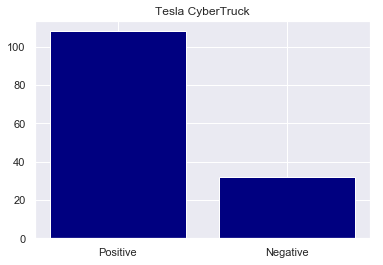

In [20]:
seaborn.set()
labels = ['Positive','Negative']
heights = [len(df_pos),len(df_neg)]
plt.bar(labels,heights,color="Navy")
plt.title("Tesla CyberTruck")